University of Zagreb  
Faculty of Electrical Engineering and Computing 
  
## Machine Learning 1 2023/2024  
http://www.fer.unizg.hr/en/course/maclea1

------------------------------

### First lab assignment: Linear Regression

*Version: 1.0  
Last updated: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Deadline: **22 October 2023, 23:59**

------------------------------

### Submission rules
By submitting the exercise, you confirm the following points:
1. You did not receive help from another when solving the exercise;
2. You attributed parts of the code that were taken from the Internet by referencing them in comments;
3. You did not use parts of the code from the Internet that are specific to the laboratory exercise;
4. You have not used UI-assistants for coding such as GitHub Copilot (including generative UI tools such as ChatGPT).

**Violation of any of the above rules is considered a misdemeanor and results in academic sanctions.**

### Instructions

The first lab assignment consists of seven tasks. Follow the instructions in the text cells below. Solving the lab assignment boils down to **supplementing this notebook**: inserting one or more cells **below** the text of the task, writing the appropriate code, and executing the cells.

Make sure you fully understand the code you've written. When submitting the assignment, you must be able to modify and re-execute your code at the request of the teaching assistant. Furthermore, you need to understand the theoretical basis of what you are doing, within the framework of what we covered in the lecture. Below some tasks you can also find questions that serve as guidelines for a better understanding of the material (**do not write** the answers to the questions in the notebook). Therefore, do not limit yourself only to solving the tasks, but feel free to experiment. This is precisely the purpose of these assignments.

You should do the assignment **independently**. You can consult others on the principle way of solving it, but ultimately you have to do the assignment yourself. Otherwise, the assignment makes no sense.

In [1]:
# Load the core libraries...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Simple regression

You are given a set of labeled examples $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Examples are stored in a matrix $\mathbf{X}$ with dimensions $N\times n$ (in this case $4\times 1$). The corresponding labels are stored in a vector $\textbf{y}$, with dimensions $N\times 1$ (in this case $4\times 1$):


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Go through the documentation of the function [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from the `sklearn` library. Use that function to generate a design matrix $\mathbf{\Phi}$ in which examples are not mapped into a higher-dimensional feature space (each example is only extended with a *dummy one* feature; $m=n+1$). 

In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Your code here
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)  #degree, interaction_only, include_bias
phi = poly.fit_transform(X)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Familiarize yourself with the [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) module. Calculate the weights $\mathbf{w}$ of a linear regression model as $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$.
Make sure you get the same result if calculating pseudoinverse $\mathbf{\Phi}^+$ of the design matrix, i.e., $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$ using the function [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Your code here
from numpy import linalg
weights = linalg.inv(phi.T @ phi) @ phi.T @ y
print(weights)
weights_2 = linalg.pinv(phi) @ y
print(weights_2)

[2.2        0.45714286]
[2.2        0.45714286]


For brevity, the vector $\mathbf{x}$ extended with the *dummy one* feature $x_0=1$ is denoted as $\tilde{\mathbf{x}}$ in the examples below.

### (c)

Calculate the empirical error using the expression $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. You can use the mean squared error function [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) from the [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.

**Q:** Above defined error function $E(h|\mathcal{D})$ and the mean square error function are not completely identical. What is the difference? Which one is more "realistic"?

In [5]:
from sklearn.metrics import mean_squared_error
# Your code here
from sklearn.metrics import mean_squared_error
D = [(X[i], y[i]) for i in range(len(X))]
print("D: ", D)
h = [weights.T @ x for x in phi]
print("h: ", h)
E1 = mean_squared_error(y, h)
E2 = 1 / 2 * np.sum([np.square(y[i] - h[i]) for i in range(len(h))])
print("E1: {0}\nE2: {1}".format(E1, E2))

D:  [(array([0]), 4), (array([1]), 1), (array([2]), 2), (array([4]), 5)]
h:  [2.2, 2.6571428571428575, 3.1142857142857143, 4.0285714285714285]
E1: 2.042857142857143
E2: 4.085714285714286


### (d)

Demonstrate that the weights $\mathbf{w}$ for the examples from $\mathcal{D}$ can not be obtained by solving the system $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, but that we indeed need pseudoinverse.

**Q:** Why is that the case? Could the problem be solved by mapping the examples into a higher-dimensional feature space? If yes, would that always work, regardless of the set of examples $\mathcal{D}$? Demonstrate on an example.

In [6]:
# Your code here
# Vaš kôd ovdje
import numpy as np
weights_exact = linalg.inv(phi) @ y
#add_dimensions = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
#add_dimensions = np.array([[1, 2, 3, 4], [5, 6, 8, 8]])
#phi_2 = phi @ add_dimensions
#weights_exact = linalg.inv(phi_2) @ y

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Study the class [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module. Check if the weights obtained by that function (accessible through `coef_` and `intercept_` attributes) are equal to those you calculated above. If that's not the case, make sure you fix the code so that they are equal.

**NB:** Pay attention to how the classes [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) use intercept and make sure you don't add it multiple times.

Calculate the predictions of the model (`predict` method) and verify that the value of the empirical error is the same as the one you calculated previously.

In [7]:
from sklearn.linear_model import LinearRegression
# Your code here
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)
h = reg.predict(X)
print("h: ", h)
print("E: ", mean_squared_error(y, h))

2.2 [0.45714286]
h:  [2.2        2.65714286 3.11428571 4.02857143]
E:  2.042857142857143


### 2. Polynomial regression and the noise effect

### (a)

Let us now consider the regression on a larger number of examples. Define the function `make_labels(X, f, noise=0)` that takes as input a matrix of unlabeled examples $\mathbf{X}_{N\times n}$ and generates a vector of their labels $\mathbf{y}_{N\times 1}$. Labels are generated as $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, where $f:\mathbb{R}^n\to\mathbb{R}$ represents the true function that generated the data (in reality, we don't know this function), and $\sigma$ is the standard deviation of the Gaussian noise, defined with the `noise` parameter. For generating the noise, you can use the function [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Generate a training set consisting of $N=50$ examples uniformly distributed in the interval $[-5,5]$ using the function $f(x) = 5 + x -2 x^2 -5 x^3$ with the noise of $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Your code here
    return [f(instance) + normal(0, noise) for instance in X]

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Your code here
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, 200)

X_first = X
y_first = y

Plot the training set using the [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function.

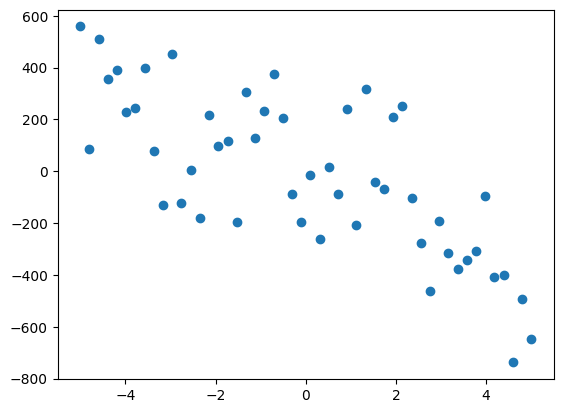

In [11]:
# Your code here
plt.scatter(X, y)
plt.show()

### (b)

Train the polynomial regression model of degree $d=3$. On the same plot, plot the learned model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ and the training set examples. Calculate the train error of the model.

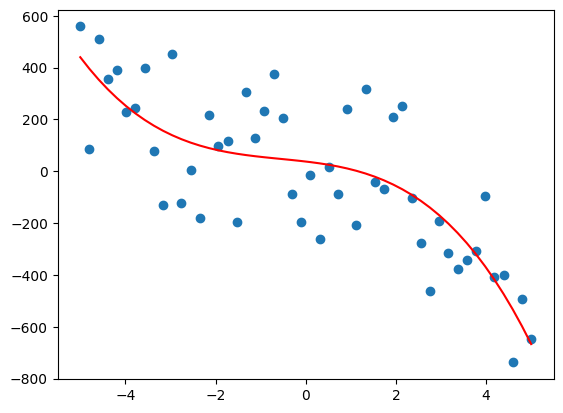

E: 33846.7583744672


In [12]:
# Your code here
poly2 = PolynomialFeatures(3)  #degree, interaction_only, include_bias
phi = poly2.fit_transform(X)
w = linalg.pinv(phi) @ y
h = [w.T @ x for x in phi]
plt.plot(X, h, color="r")
plt.scatter(X, y)
plt.show()
print("E: {}".format(mean_squared_error(y, h)))

### 3. Model selection

### (a)

Using the training set from task 2, train five linear regression models $\mathcal{H}_d$ of varying complexity, where $d$ representes the degree of the polynomial, $d\in\{1,3,5,10,20\}$. On the same plot, show the training set and the functions $h_d(\mathbf{x})$ for each of the five models (we recommend that you use `plot` inside the `for` loop). Calculate the train error for each of the models.

**Q:** Which model has the lowest training error and why?

d = 1, E: 41254.739658744766
d = 3, E: 33846.7583744672
d = 5, E: 33582.83147431577
d = 10, E: 26926.826816739063
d = 20, E: 20103.85753911735


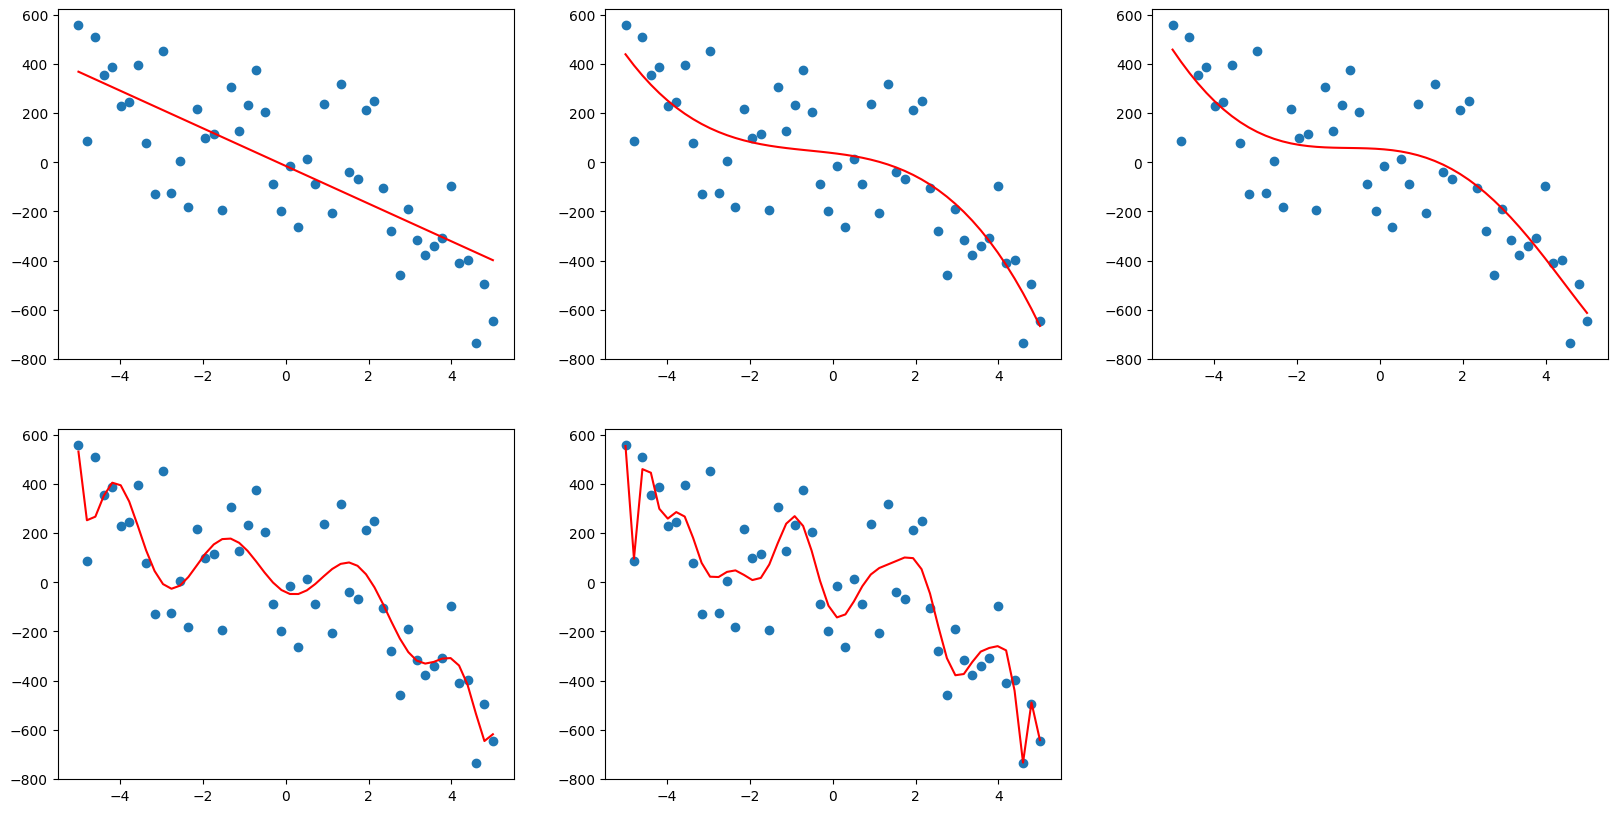

In [13]:
# Your code here
degrees = [1, 3, 5, 10, 20]
fig = plt.figure(figsize=(20, 10))
i = 0

for d in degrees:
    i += 1
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    w = linalg.pinv(phi) @ y
    h = [w.T @ x for x in phi]

    s = fig.add_subplot(2, 3, i)
    s.plot(X, h, color="r")
    s.scatter(X, y)

    E = mean_squared_error(y, h)
    print("d = {0}, E: {1}".format(d, E))

### (b)

Split the training set from the task 2 into a train and test set in the ratio 1:1 using the function [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). On the same plot, show the train and the test error for polynomial regression models $\mathcal{H}_d$, with the polynomial degrees in the range $d\in [1,2,\ldots,20]$. Since squared error grows fast for larger degrees, instead of plotting the true values of the error function, plot their logarithms.

**NB:** Train and test splits must be the same for each of the twenty models.

**Q:** Did the plot turn out as you expected? Which model would you choose among those and why?

**Q:** Run the cell many times. Do you notice any problem? Would the problem be equally visible if we had more examples? Why?

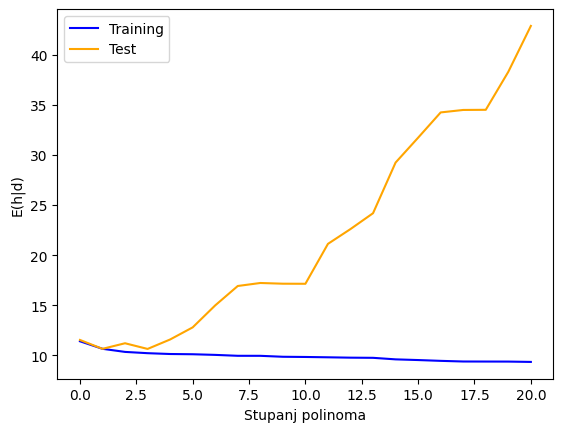

In [14]:
from sklearn.model_selection import train_test_split
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train_second, X_test_second = X_train, X_test
y_train_second, y_test_second = y_train, y_test

degrees = [i for i in range(21)]
E_train = []
E_test = []
for d in degrees:
    poly = PolynomialFeatures(d)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)
    w = linalg.pinv(phi_train) @ y_train

    h_train = [w.T @ x for x in phi_train]
    h_test = [w.T @ x for x in phi_test]
    E_train.append(mean_squared_error(y_train, h_train))
    E_test.append(mean_squared_error(y_test, h_test))

plt.plot(degrees, np.log(E_train), color="blue", label="Training")
plt.plot(degrees, np.log(E_test), color="orange", label="Test")
plt.xlabel("Stupanj polinoma")
plt.ylabel("E(h|d)")
plt.legend()
plt.show()

### (c)

Accuracy of the model depends on (1) its complexity (degree $d$ of the polynomial), (2) number of examples $N$, and (3) the amount of noise. In order to analyze these dependencies, plot the errors as in the task 3b, but for different $N\in$ (a third, two thirds, all) and noise amounts $\sigma\in\{100,200,500\}$ (9 plots in total). Use the function [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) to clearly arrange the plots in a $3\times 3$ table. Data should be generated in the sama way as in the task 2.

**NB:** Make sure that all the plots are generated on the comparable datasets, in the following manner. First, generate all 1000 examples, split those into train and test sets (two sets, each with 500 examples). Then, create three different versions from both the train and the test set, each version with a different amount of noise (in total 2x3=6 dataset versions). In order to simulate the amount of data ($N$), using the obtained 6 dataset versions sample a third, two thirds, and all the examples. This leaves you with a total of 18 datasets -- a pair of train and test sets for each of the nine plots.

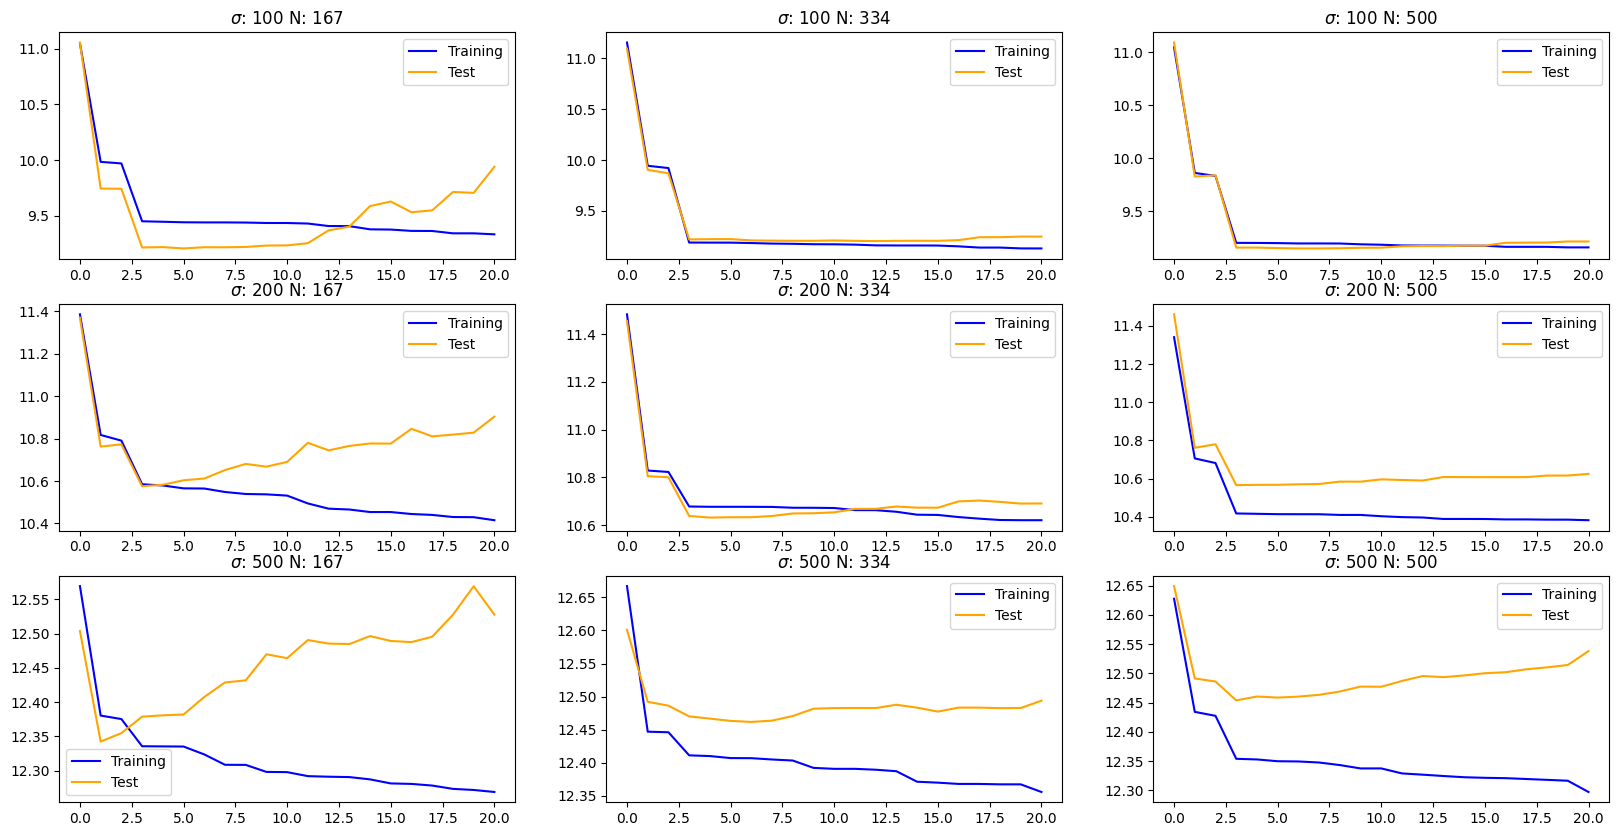

In [15]:
# Your code here
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)
noises = [100, 200, 500]
degrees = [i for i in range(21)]
fig = plt.figure(figsize = (20, 10))
j = 1
for noise in noises:
    for i in range(3):
        E_train = []
        E_test = []
        mask = np.arange(len(X_train)) % 3 <= i
        X_tret_train = X_train[mask]
        X_tret_test = X_test[mask]
        
        y_tret_train = make_labels(X_tret_train, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, noise)
        y_tret_test = make_labels(X_tret_test, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, noise)

        for d in degrees:
            poly = PolynomialFeatures(d)
            phi_train = poly.fit_transform(X_tret_train)
            phi_test = poly.fit_transform(X_tret_test)
            w = linalg.pinv(phi_train) @ y_tret_train
            
            h_train = [w.T @ x for x in phi_train]
            h_test = [w.T @ x for x in phi_test]
            E_train.append(mean_squared_error(y_tret_train, h_train))
            E_test.append(mean_squared_error(y_tret_test, h_test))
        
        s = fig.add_subplot(3, 3, j)
        s.plot(degrees, np.log(E_train), color="blue", label="Training")
        s.plot(degrees, np.log(E_test), color="orange", label="Test")
        s.set_title("$\sigma$: {} N: {}".format(noise, len(X_tret_train)))
        s.legend()
        j += 1


**Q:** Did the results turn out as expected? Explain.

### 4. Regularized regression

### (a)

In the experiments above we didn't use **regularization**. Let's go back to the example from the Task 1. Using the examples from that task, calculate the weights $\mathbf{w}$ for the polynomial regression model of the degree $d=3$ using L2 regularization (known as *ridge regression*), using the expression $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Calculate the weights using the regularization factors $\lambda=0$, $\lambda=1$ and $\lambda=10$ and compare the obtained weights.

**Q:** What is the dimension of the matrix that should be inverted?

**Q:** What are the differences between the obtained weights and are those differences expected? Explain.

In [16]:
# Your code here
factors = [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)

trunacted = np.identity(4)
trunacted[0][0] = 0

for factor in factors:
    inv = linalg.inv(phi.T @ phi + factor * trunacted)
    weights = inv @ phi.T @ y
    print("lambda = {:2}: {}".format(factor, weights))

lambda =  0: [ 4.         -5.91666667  3.375      -0.45833333]
lambda =  1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda = 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Study the [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class from the [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module, which implements L2-regularized regression model. Parameter $\alpha$ corresponds to the $\lambda$ parameter. Apply this model on the same examples as in the previous task and print out the obtained weights $\mathbf{w}$ (attributes `coef_` and `intercept_`). Again, pay attention to the intercept.

**Q:** Are the weights identical to those from the Task 4a? If not, explain why is that and how would you fix it?

In [17]:
from sklearn.linear_model import Ridge
# Your code here
from sklearn.linear_model import Ridge
for factor in factors:
    r = Ridge(factor)
    r.fit(phi, y)
    print("lambda = {:2}:\n{}".format(factor, r.intercept_))
    print(r.coef_)

lambda =  0:
4.000000000000021
[ 0.         -5.91666667  3.375      -0.45833333]
lambda =  1:
3.0569614512471652
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
lambda = 10:
2.4944418431229725
[ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Let's go back to the case of $N=50$ randomly generated examples from the Task 2. Train the polynomial regression models $\mathcal{H}_{\lambda,d}$ for $\lambda\in\{0,100\}$ and $d\in\{2,10\}$ (four models in total). Plot the corresponding functions $h(\mathbf{x})$ and the examples (on the same plot; we recommend that you use `plot` inside a `for` loop).

**Q:** Are the results that you obtained expected? Explain.

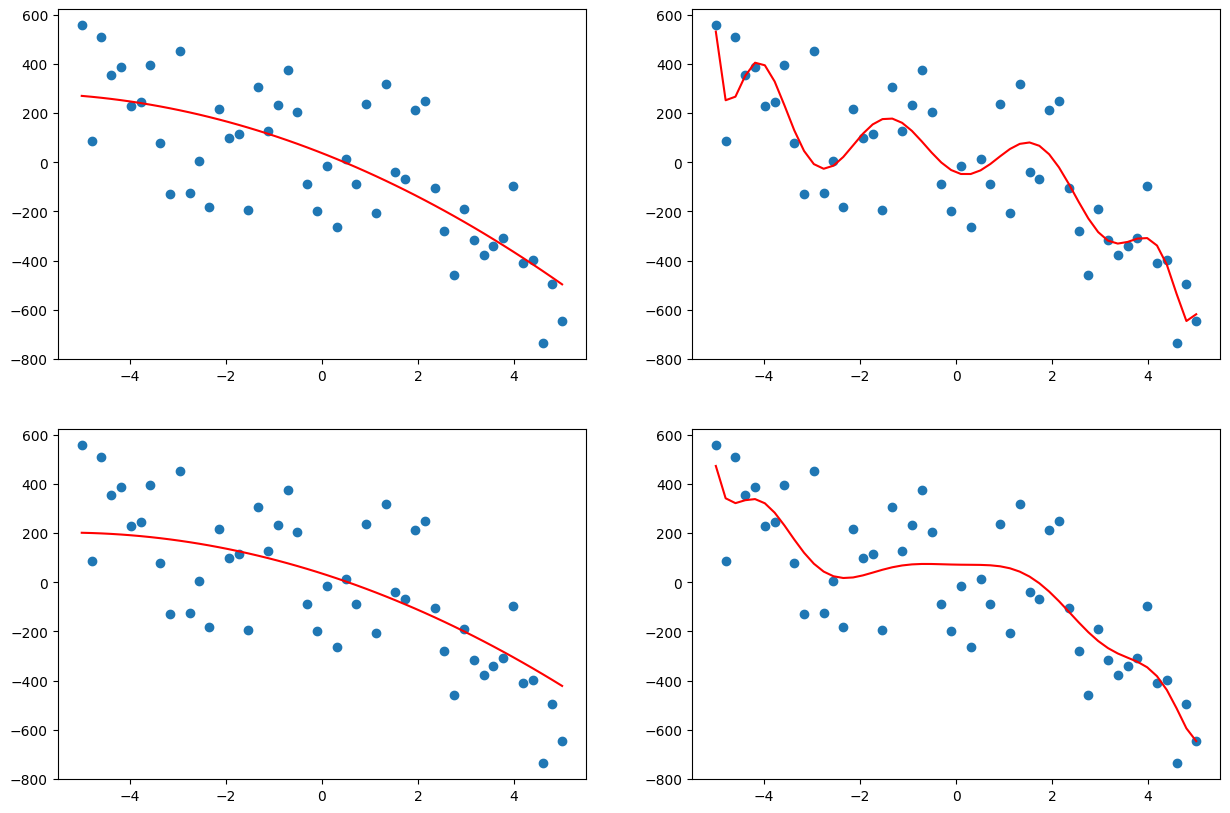

In [18]:
# Your code here
factors = [0, 100]
degrees = [2, 10]

X = X_first
y = y_first

fig = plt.figure(figsize = (15, 10))

j = 1
for factor in factors:
    for d in degrees:
        trunacted = np.identity(d + 1)
        trunacted[0][0] = 0

        poly = PolynomialFeatures(d)
        phi = poly.fit_transform(X)

        inv = linalg.inv(phi.T @ phi + factor * trunacted)
        w = inv @ phi.T @ y
        h = [w.T @ x for x in phi]
        
        s = fig.add_subplot(2, 2, j)
        s.plot(X, h, color="r")
        s.scatter(X, y)
        j += 1

### (d)

As in the Task 3b, split the dataset into a train and a test set in the ratio 1:1. Plot the logarithms of the train and test errors with respect to the model $\mathcal{H}_{d=10,\lambda}$, varying the regularization factor $\lambda$ in the range $\lambda\in\{0,1,\dots,50\}$.

**Q:** Which area of the plot corresponds to the overfitting and which one to the underfitting? Why?

**Q:** Which value for $\lambda$ would you choose based on these plots and why?

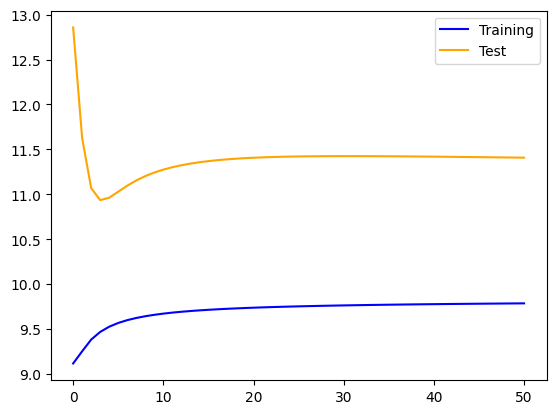

In [19]:
# Your code here
d = 10
factors = np.arange(51)
X = X_first
y = y_first
E_train = []
E_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
for factor in factors:
    poly = PolynomialFeatures(d)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)

    trunacted = np.identity(d + 1)
    trunacted[0][0] = 0
    inv = linalg.inv(phi_train.T @ phi_train + factor * trunacted)
    w = inv @ phi_train.T @ y_train
    h_train = [w.T @ x for x in phi_train]
    h_test = [w.T @ x for x in phi_test]
    E_train.append(mean_squared_error(y_train, h_train))
    E_test.append(mean_squared_error(y_test, h_test))

plt.plot(factors, np.log(E_train), color="blue", label="Training")
plt.plot(factors, np.log(E_test), color="orange", label="Test")
plt.legend()
plt.show()


### 5. L1-regularization and L2-regularization

The goal of regularization is to push down to zero as many of the model's weights $\mathbf{w}$ as possible in order to obtain a simpler model. Model's complexity can be characterized using the norm of the model's weights vector $\mathbf{w}$, typically using L2 or L1 norm. For a trained model we can also determine the number of non-zero features, or L0 norm, using the following function that takes a weights vector $\mathbf{w}$ as input:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

For this task, use the train and test sets from the Task 3b. Train **L2-regularized** polynomial regression models of degree $d=5$, varying the hyperparameter $\lambda$ in the range $\{1,2,\dots,100\}$. For each of the trained models, calculate the L{0,1,2} norms of the weight vector $\mathbf{w}$. Plot the values of the norms as a function of $\lambda$. Pay attention to what exactly is passed to the function for the norm calculation.

**Q:** Explain the shape of the obtained curves. Will the curve for $\|\mathbf{w}\|_2$ ever reach zero? Why? Is that a problem? Why?

**Q:** For $\lambda=100$, what percentage of the weights is equal to zero, or, in other words, how sparse is the model?

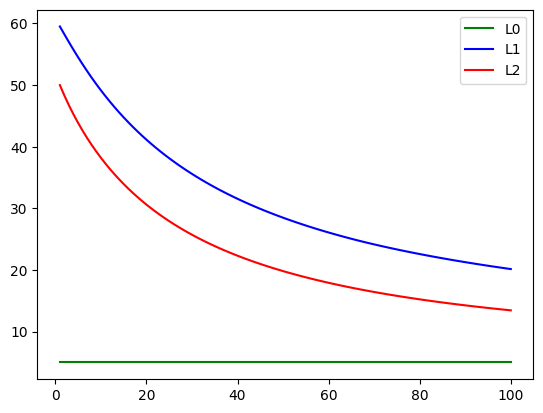

In [21]:
from sklearn.linear_model import Ridge
# Your code here
d = 5
factors = np.arange(1, 101)
L0, L1, L2 = [], [], []
X_train, X_test = X_train_second, X_test_second
y_train, y_test = y_train_second, y_test_second

for factor in factors:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X_train)
    r = Ridge(factor)
    r.fit(phi, y_train)
    L0.append(nonzeroes(r.coef_[0]))
    L1.append(np.sum(abs(r.coef_)))
    L2.append(np.sqrt(np.sum(np.square(r.coef_))))

plt.plot(factors, L0, color="green", label="L0")
plt.plot(factors, L1, color="blue", label="L1")
plt.plot(factors, L2, color="red", label="L2")
plt.legend()

### (b)

The main advantage of the L1 regularized regression (or *LASSO regression*) over the L2 regularized regression is that L1 regularized regression results in **sparse models**, i.e., the models that have many weights pushed to zero. Show that this really happens by running the experiment from above using **L1 regularized** regression, implemented in the class [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) in the package [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

c:\Users\Antonio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+05, tolerance: 2.236e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Antonio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+05, tolerance: 2.236e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Antonio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

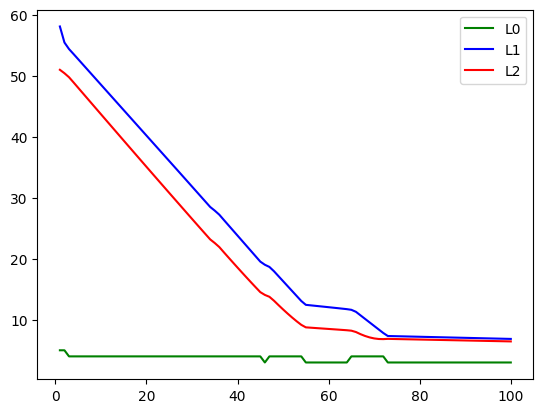

In [23]:
from sklearn.linear_model import Lasso
# Your code here
d = 5
factors = np.arange(1, 101)
L0, L1, L2 = [], [], []
X_train, X_test = X_train_second, X_test_second
y_train, y_test = y_train_second, y_test_second

for factor in factors:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X_train)
    l = Lasso(factor)
    l.fit(phi, y_train)
    L0.append(nonzeroes(l.coef_))
    L1.append(np.sum(abs(l.coef_)))
    L2.append(np.sqrt(np.sum(np.square(l.coef_))))

plt.plot(factors, L0, color="green", label="L0")
plt.plot(factors, L1, color="blue", label="L1")
plt.plot(factors, L2, color="red", label="L2")
plt.legend()

### 6. Features of different scales

In practice, we often encounter the datasets where not all features are of the same magnitude. An example of such dataset is the regression dataset `grades` in which the task is to predict student's average grade at college (1--5) based on two features: number of points that student obtained on the entry exam (1--3000) and student's average grade in high school. Average grade on college is calculated as a weighted sum of the two features with added noise.

Use the following code to generate such dataset.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generate the data of entry exam points using normal distribution and limit the points to the interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generate the data of high school grades using normal distribution and limit them to the interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Design matrix.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Finally, generate the output values (average college grade).
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Plot the relationship between the dependent variable (y-axis) and the first feature, as well as the second feature (x-axis). Plot two separate graphs.

Text(0.5, 1.0, "Student's average grade based on student's average grade in high school")

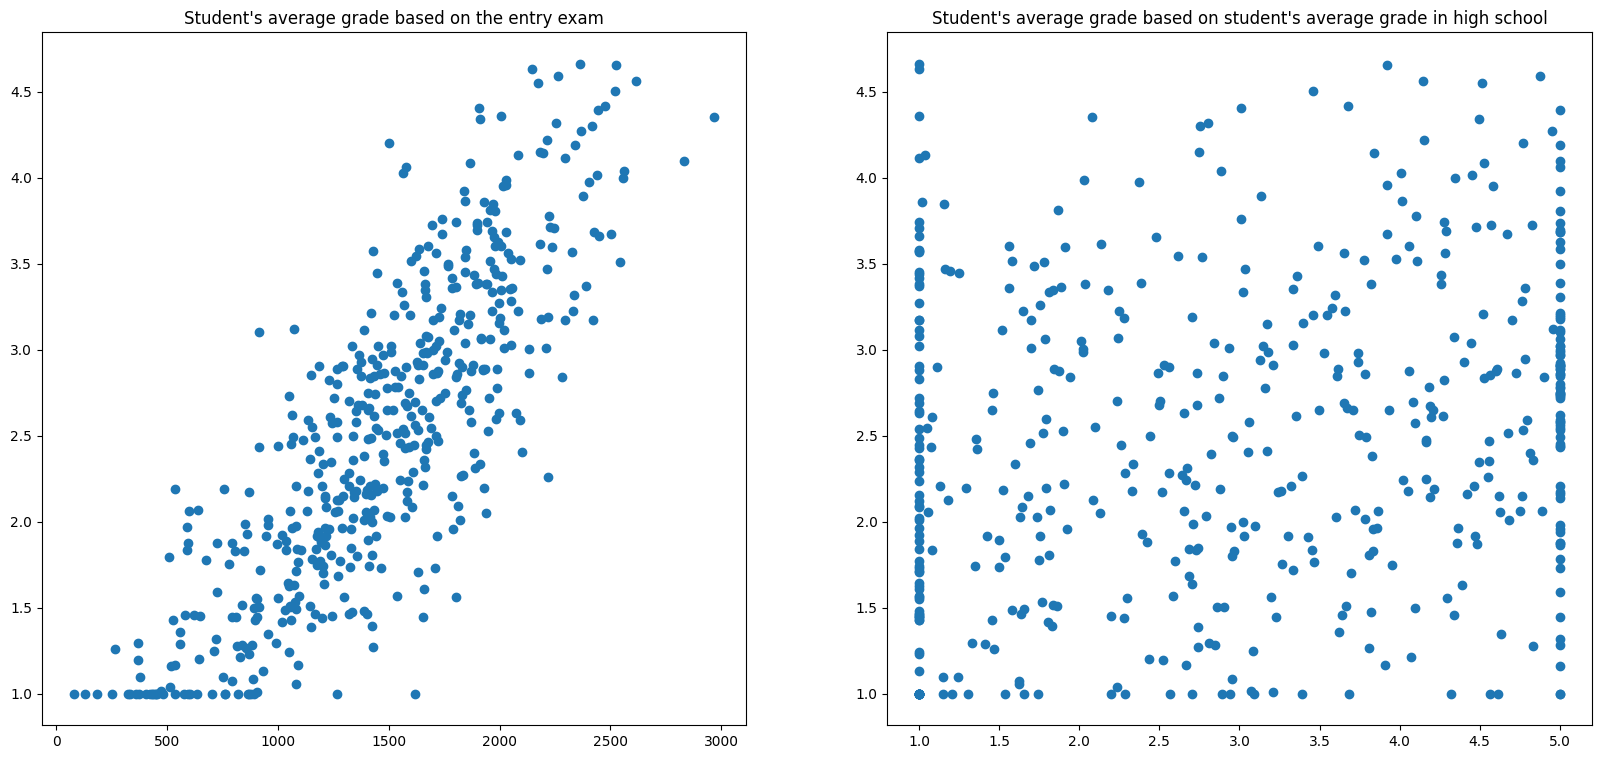

In [25]:
# Your code here
fig = plt.figure(figsize = (20, 9))
s1 = fig.add_subplot(1, 2, 1)
s1.scatter(exam_score, grades_y)
s1.set_title("Student's average grade based on the entry exam")
s2 = fig.add_subplot(1, 2, 2)
s2.scatter(grade_in_highschool, grades_y)
s2.set_title("Student's average grade based on student's average grade in high school")

### b)

Train the L2 regularized regression model ($\lambda = 0.01$) using the data in `grades_X` and `grades_y`:

In [26]:
# Your code here
factor = 0.01
poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X)
r = Ridge(0.01)
r.fit(phi, grades_y)
print(r.intercept_)
print(r.coef_)

0.1506117957577615
[0.         0.00141497 0.09477276]


Now repeat the experiment from the above, but first scale the data `grades_X` and `grades_y` and store those into variables `grades_X_fixed` and `grades_y_fixed`. For this, use [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
from sklearn.preprocessing import StandardScaler
# Your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y = grades_y.reshape(500, 1)
grades_y_fixed = scaler.fit_transform(grades_y)
factor = 0.01
poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X_fixed)
r = Ridge(0.01)
r.fit(phi, grades_y_fixed)
print(r.intercept_)
print(r.coef_)

[8.07023426e-17]
[[0.         0.81630375 0.15167761]]


**Q:** Looking at the plots from the subtask (a), which feature should have a larger magniture, or, in other words, higher importance when predicting college average grade? Do the obtained weights support your intuiton? Explain. 

### 7. Multicollinearity

### a)

Duplicate the last column (average high school grade) in the dataset `grades_X_fixed` and store this new dataset into variable `grades_X_fixed_colinear`. This effectively introduces perfect multicollinearity.

In [28]:
# Your code here
grades_X_fixed_colinear = np.array([grades_X_fixed[:,0], grades_X_fixed[:,1], grades_X_fixed[:,1]]).T
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Again, train the L2 regularized regression model ($\lambda = 0.01$), but now using the dataset `grades_X_fixed_colinear`.

In [29]:
# Your code here
factor = 0.01
poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X_fixed_colinear)
r = Ridge(0.01)
r.fit(phi, grades_y_fixed)
print(r.intercept_)
print(r.coef_)

[8.07031579e-17]
[[0.         0.81630364 0.07583957 0.07583957]]


**Q:** Compare the weights with those obtained in the Task *7b*. What is the difference?

### b)

Randomly sample 50% of the examples from the dataset `grades_X_fixed_colinear` and train two L2 regularized regression models, one with $\lambda=0.01$ and the other with $\lambda=1000$. Repeat this experiment 10 times (each time with a different subsample of 50% of the examples). For each model, print out the obtained weights vector in each of the 10 repetitions. Also, print out the standard deviation for each weight (six standard deviations in total, each obtained over 10 values).

In [30]:
# Your code here
w01 = []
w1000 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, train_size=0.5)
    poly = PolynomialFeatures(1)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)
    trunacted = np.identity(4)
    trunacted[0][0] = 0

    for factor in [0.01, 1000]:
        inv = linalg.inv(phi_train.T @ phi_train + factor * trunacted)
        w = inv @ phi_train.T @ y_train
        if factor == 0.01:
            w01.append(w)
        else:
            w1000.append(w)
        print ("{}. experiment, lambda {}, weights {}".format(i+1, factor, w.reshape(4,)))

for factor in [0.01, 1000]:
    l = []
    for i in range(1, 4):
        if factor == 0.01:
            l.append(np.std(np.array(w01)[:,i]))
        else:
            l.append(np.std(np.array(w1000)[:,i]))
    print("standard deviation of weights for lambda = {}".format(factor))
    print(l)

1. experiment, lambda 0.01, weights [-0.01045662  0.79385128  0.06504303  0.06504303]
1. experiment, lambda 1000, weights [-0.0234989   0.16436364  0.03812874  0.03812874]
2. experiment, lambda 0.01, weights [0.02152062 0.80739011 0.0761075  0.0761075 ]
2. experiment, lambda 1000, weights [0.03212117 0.15992321 0.02415424 0.02415424]
3. experiment, lambda 0.01, weights [0.00921447 0.814158   0.07673386 0.07673386]
3. experiment, lambda 1000, weights [-0.02601733  0.16128257  0.02717137  0.02717137]
4. experiment, lambda 0.01, weights [-0.01820559  0.83265053  0.07483515  0.07483515]
4. experiment, lambda 1000, weights [-0.04966402  0.16579999  0.03405283  0.03405283]
5. experiment, lambda 0.01, weights [0.01261939 0.79735626 0.08013669 0.08013669]
5. experiment, lambda 1000, weights [-0.0250465   0.15703356  0.02664742  0.02664742]
6. experiment, lambda 0.01, weights [0.00283109 0.81845427 0.04525193 0.04525193]
6. experiment, lambda 1000, weights [0.01706322 0.17833349 0.03188297 0.03

**Q:** How regularization affects the weights stability?  
**Q:** Are the coefficients of the same magnitude as in the previous experiment? Explain why.